# Krzywa kuznetsa

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
clean_data = pd.read_csv("clean_data.csv", encoding="latin1")

clean_data = clean_data.rename(columns={
    "ï»¿Kraj": "Kraj"
})

In [21]:
df = clean_data.dropna(subset=['PKB_pc', 'Gini']).copy()
df['Gini'] = df['Gini']/100

df['log_pkb'] = np.log(df['PKB_pc'])
df['log_pkb2'] = df['log_pkb'] ** 2

X = sm.add_constant(df[['log_pkb', 'log_pkb2']])
y = df['Gini']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     253.4
Date:                Sun, 04 Jan 2026   Prob (F-statistic):          2.26e-100
Time:                        20:57:10   Log-Likelihood:                 2626.8
No. Observations:                2347   AIC:                            -5248.
Df Residuals:                    2344   BIC:                            -5230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0563      0.156     -6.781      0.0

In [22]:
X = sm.add_constant(df[['log_pkb', 'log_pkb2']])
y = df['Indeks_nierow']

model2 = sm.OLS(y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          Indeks_nierow   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           3.89e-82
Time:                        20:57:12   Log-Likelihood:                -3114.6
No. Observations:                2347   AIC:                             6235.
Df Residuals:                    2344   BIC:                             6253.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1811      1.799     -8.997      0.0

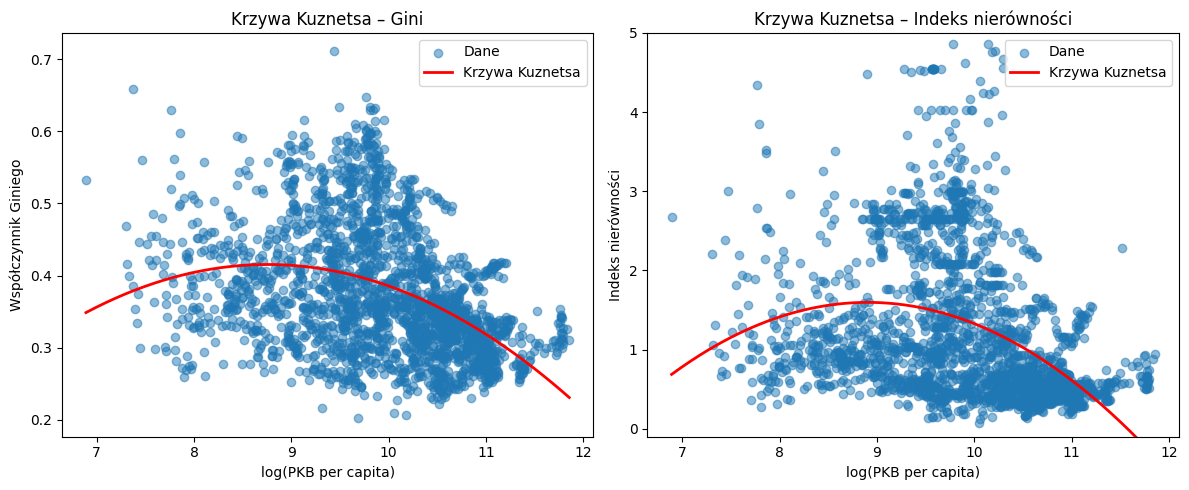

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Zakres PKB
gdp_range = np.linspace(df['log_pkb'].min(), df['log_pkb'].max(), 200)

# --- Subplot 1: Gini ---
pred = model.predict(
    sm.add_constant(
        pd.DataFrame({
            'log_pkb': gdp_range,
            'log_pkb2': gdp_range**2
        })
    )
)

axes[0].scatter(df['log_pkb'], df['Gini'], alpha=0.5, label='Dane')
axes[0].plot(gdp_range, pred, color='red', linewidth=2, label='Krzywa Kuznetsa')
axes[0].set_xlabel('log(PKB per capita)')
axes[0].set_ylabel('Współczynnik Giniego')
axes[0].set_title('Krzywa Kuznetsa – Gini')
axes[0].legend()

# --- Subplot 2: Indeks nierówności ---
pred2 = model2.predict(
    sm.add_constant(
        pd.DataFrame({
            'log_pkb': gdp_range,
            'log_pkb2': gdp_range**2
        })
    )
)

axes[1].scatter(df['log_pkb'], df['Indeks_nierow'], alpha=0.5, label='Dane')
axes[1].plot(gdp_range, pred2, color='red', linewidth=2, label='Krzywa Kuznetsa')
axes[1].set_xlabel('log(PKB per capita)')
axes[1].set_ylabel('Indeks nierówności')
axes[1].set_ylim(-0.1, 5)
axes[1].set_title('Krzywa Kuznetsa – Indeks nierówności')
axes[1].legend()

plt.tight_layout()
plt.show()


In [25]:
df_europe = clean_data[clean_data['Kontynent'] == 'Europe']

In [28]:
df_europe = df_europe.dropna(subset=['PKB_pc', 'Gini']).copy()
df_europe['Gini'] = df_europe['Gini']/100

df_europe['log_pkb'] = np.log(df_europe['PKB_pc'])
df_europe['log_pkb2'] = df_europe['log_pkb'] ** 2

X = sm.add_constant(df_europe[['log_pkb', 'log_pkb2']])
y = df_europe['Gini']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     19.27
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           6.12e-09
Time:                        21:09:14   Log-Likelihood:                 1747.5
No. Observations:                1007   AIC:                            -3489.
Df Residuals:                    1004   BIC:                            -3474.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1412      0.271      0.521      0.6

In [29]:
X = sm.add_constant(df_europe[['log_pkb', 'log_pkb2']])
y = df_europe['Indeks_nierow']

model2 = sm.OLS(y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          Indeks_nierow   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.300
Date:                Sun, 04 Jan 2026   Prob (F-statistic):            0.00513
Time:                        21:17:27   Log-Likelihood:                -37.073
No. Observations:                1007   AIC:                             80.15
Df Residuals:                    1004   BIC:                             94.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4150      1.595      0.260      0.7

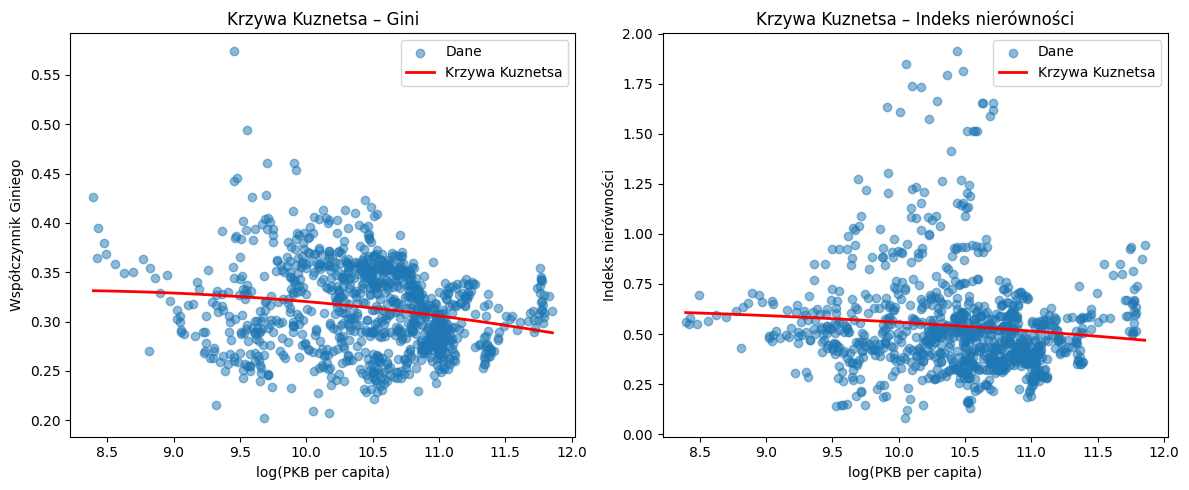

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Zakres PKB
gdp_range = np.linspace(df_europe['log_pkb'].min(), df_europe['log_pkb'].max(), 200)

# --- Subplot 1: Gini ---
pred = model.predict(
    sm.add_constant(
        pd.DataFrame({
            'log_pkb': gdp_range,
            'log_pkb2': gdp_range**2
        })
    )
)

axes[0].scatter(df_europe['log_pkb'], df_europe['Gini'], alpha=0.5, label='Dane')
axes[0].plot(gdp_range, pred, color='red', linewidth=2, label='Krzywa Kuznetsa')
axes[0].set_xlabel('log(PKB per capita)')
axes[0].set_ylabel('Współczynnik Giniego')
axes[0].set_title('Krzywa Kuznetsa – Gini')
axes[0].legend()

# --- Subplot 2: Indeks nierówności ---
pred2 = model2.predict(
    sm.add_constant(
        pd.DataFrame({
            'log_pkb': gdp_range,
            'log_pkb2': gdp_range**2
        })
    )
)

axes[1].scatter(df_europe['log_pkb'], df_europe['Indeks_nierow'], alpha=0.5, label='Dane')
axes[1].plot(gdp_range, pred2, color='red', linewidth=2, label='Krzywa Kuznetsa')
axes[1].set_xlabel('log(PKB per capita)')
axes[1].set_ylabel('Indeks nierówności')
axes[1].set_title('Krzywa Kuznetsa – Indeks nierówności')
axes[1].legend()

plt.tight_layout()
plt.show()
